In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold

In [2]:
# Data params
textures = 11
trials = 100

# Set bin and sim params
bin_size = 1   # Bin size in ms
sim_length = 300   # Sim time in ms
bins = sim_length / bin_size

In [3]:
# Import dataset and labels from pickle
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/histogram_classifier/"
DATA_NAME = str(sim_length) + "ms - " + str(bin_size) + "ms bin size dataset.pickle"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"

# Import dataset first
FILENAME = PATH + DATA_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        dataset = pickle.load(openfile)
    except EOFError:
        print(EOFError)
        
# Now import label array
FILENAME = PATH + LABEL_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [4]:
#print(len(dataset))

In [5]:
# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
#print(dataset[0])
#dataset = np.delete(dataset, 0, 0)
#print(len(dataset))
if len(dataset) == 1101:
    dataset = np.delete(dataset, 0, 0)
    
# Split data into testing and training
# Ration currently 80-20
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [6]:
# # Create knn classifier w/5 neighbours and fit it to the training data
# # Play around with this value when determining accuracy
# knn = KNeighborsClassifier(n_neighbors=10)

# # Fit the model to the training data
# knn.fit(x_train, y_train)

In [7]:
# Create kfold validation model
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [8]:
# Use sklearn accuracy metrics to asses
# Test over a range of neighbour numbers
# TO DO: Use KFold cross validation for this method

max_n = 20

# accuracy_scores = []
# recall_scores = []
# precision_scores = []
train_accuracies = [[] for _ in range(max_n)]
val_accuracies = [[] for _ in range(max_n)]

x_train = np.array(x_train)
y_train = np.array(y_train)

for n in range(max_n):
    
    knn = KNeighborsClassifier(n_neighbors=n+1)
    
    # Loop through each of the folds within the kfold
    for train_index, val_index in kf.split(x_train):
        # Create folded data
        Xtrain, Xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        
        # Fit the model to the new folded training data
        knn.fit(Xtrain, ytrain)

        # Precit value using KNN
        #y_pred = knn.predict(x_test)
        pred_train = knn.predict(Xtrain)
        pred_val = knn.predict(Xval)

        #Calculate the accuracy of the predictions on the training set 
        #and save in the variable train_accuracies
        train_accuracies[n].append(accuracy_score(ytrain, pred_train))
        train_accuracies[n].append(recall_score(ytrain, pred_train, average='micro'))
        train_accuracies[n].append(precision_score(ytrain, pred_train, average='micro'))
        
        #Do the same for the predictions on the validation set
        ###TODO###
        val_accuracies[n].append(accuracy_score(yval, pred_val))
        val_accuracies[n].append(recall_score(yval, pred_val, average='micro'))
        val_accuracies[n].append(precision_score(yval, pred_val, average='micro'))

In [12]:
print(train_accuracies)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.6616161616161617, 0.6616161616161617, 0.6616161616161617, 0.6704545454545454, 0.6704545454545454, 0.6704545454545454, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727, 0.648989898989899, 0.648989898989899, 0.648989898989899, 0.6578282828282829, 0.6578282828282829, 0.6578282828282829, 0.6603535353535354, 0.6603535353535354, 0.6603535353535354, 0.6590909090909091, 0.6590909090909091, 0.6590909090909091, 0.6578282828282829, 0.6578282828282829, 0.6578282828282829, 0.6578282828282829, 0.6578282828282829, 0.6578282828282829, 0.6477272727272727, 0.6477272727272727, 0.6477272727272727], [0.5366161616161617, 0.5366161616161617, 0.5366161616161617, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5391414141414141, 0.5391414141414141, 0.5391414141414141, 0.5202020202020202, 0.5202020202020202, 0.5202020202020202, 0.53535

In [9]:
#Calculate the mean for training and validation accuracies
train_accuracy_mean = np.mean(train_accuracies, axis=1)
val_accuracy_mean = np.mean(val_accuracies, axis=1)

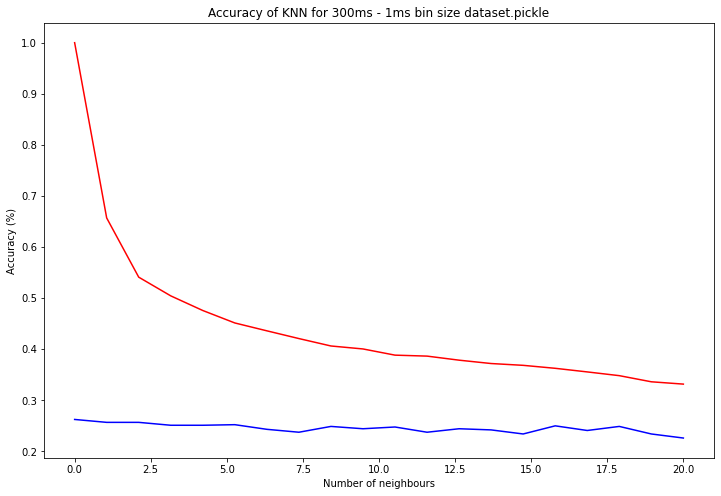

In [10]:
# Plot this data
x = np.linspace(0, max_n, 20)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, train_accuracy_mean, color='r',label='Training Accuracy Mean')
ax.plot(x, val_accuracy_mean, color='b',label='Validation Accuracy Mean')
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of KNN for " + DATA_NAME)
plt.savefig("/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/classifier_results/" +
                    DATA_NAME + ".png")
plt.show()
ax.legend()